In [57]:
import numpy as np
import os
import matplotlib.pyplot as plt

## Definition of measurements

Overall Simulation Time (OST) represents the total simulation time for each run, which is calculated by taking the average of each processor running time.

Average Jacobian Time per Iteration (AJT) represents the average jacob time per iteration, which is calculated by taking the average of each output jacob time per iteration of the time step.

Average Time per Timestep (ATT) represents the average time for time step, which is calculated by taking the the average of each time step running time. 

Please Note that large, mid and small means the programs are running on different [Nx,Ny], accordingly they are [402,202], [201,101], [101,51].


In [51]:
# These results come from log o files.
cores = np.array([4,8,16,32,64,128])

OST_large = np.array([2058.48,371.461,223.814,219.345,128.495,125.047])
OST_mid = np.array([82.0037,62.6717,48.5574,66.0242,40.1144,72.0238])
OST_small = np.array([33.7472,14.2873,14.3229,17.3535,19.5359,28.9615])

AJT_large = np.array([0.000409387,0.000100191,7.82921e-05,0.000102799,5.83964e-05,7.45102e-05])
AJT_mid = np.array([4.46666e-05,4.70396e-05,3.99967e-05,6.61734e-05,4.31581e-05,8.26182e-05])
AJT_small = np.array([3.40613e-05,2.07004e-05,2.53381e-05,3.56411e-05,4.36271e-05,7.0999e-05])

ATT_large =np.array([20.3735,3.66158,2.18984,2.13799,1.23842,1.12788])
ATT_mid =np.array([0.803729,0.613197,0.470023,0.636511,0.380708,0.633393])
ATT_small =np.array([0.332448,0.138108,0.136219,0.163567,0.184036, 0.258404])

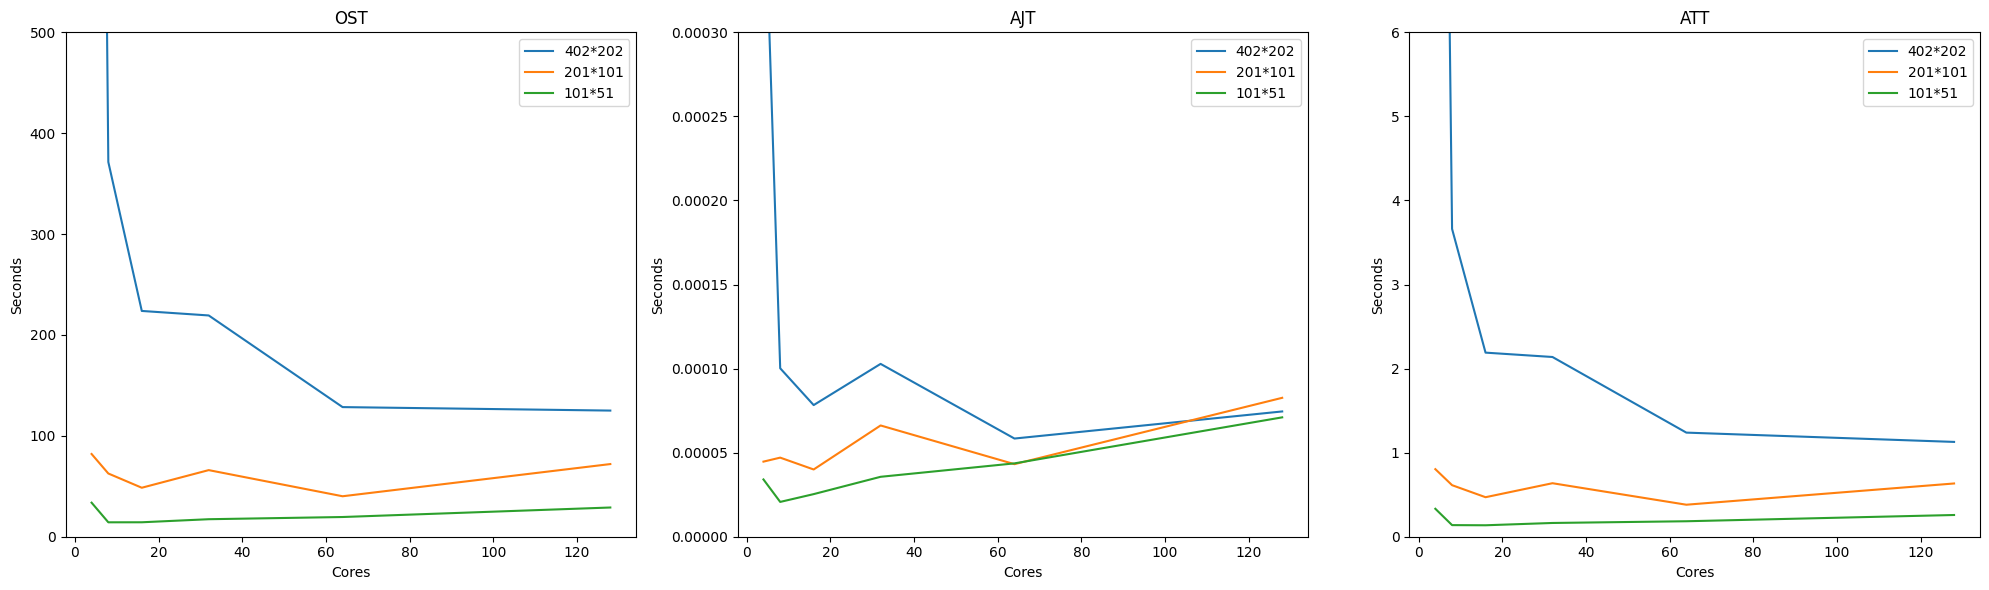

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# OST plot
axs[0].plot(cores, OST_large, label='402*202')
axs[0].plot(cores, OST_mid, label='201*101')
axs[0].plot(cores, OST_small, label='101*51')
axs[0].set_xlabel('Cores')
axs[0].set_ylabel('Seconds')
axs[0].set_title('OST')
axs[0].set_ylim([0, 500])
axs[0].legend()

axs[1].plot(cores, AJT_large, label='402*202')
axs[1].plot(cores, AJT_mid, label='201*101')
axs[1].plot(cores, AJT_small, label='101*51')
axs[1].set_xlabel('Cores')
axs[1].set_ylabel('Seconds')
axs[1].set_title('AJT')
axs[1].set_ylim([0, 0.0003])
axs[1].legend()

# ATT plot
axs[2].plot(cores, ATT_large, label='402*202')
axs[2].plot(cores, ATT_mid, label='201*101')
axs[2].plot(cores, ATT_small, label='101*51')
axs[2].set_xlabel('Cores')
axs[2].set_ylabel('Seconds')
axs[2].set_title('ATT')
axs[2].set_ylim([0, 6])
axs[2].legend()

plt.tight_layout()
plt.show()

## Analysis for OST, AJT and ATT

Overall Simulation Time (OST): The OST is the total time each simulation takes to run. In all cases (large, mid, and small), as we add more cores (essentially more computing power), the simulation finishes quicker, which is what we'd expect. However, the decrease in time isn't straightforward - at some points, we even see the OST increase a little or oscillate. This is likely because as we add more cores, the time it takes for them to communicate with each other begins to overshadow the time saved by running the simulation on more cores. Also, there's a limit to the benefits of adding more cores. If our grid isn't big enough, adding more cores may actually slow things down.

Average Jacobian Time per Iteration (AJT): AJT is the average time each Jacobian iteration takes. Like the OST, AJT generally decreases as we add more cores. However, there are occasional increases or oscillations. Interestingly, we see that as we add more cores, the AJT starts to settle around a certain value, no matter the size of the grid. This makes sense because with more cores and smaller regions to compute, each core has less data to process. When the amount of data is small enough, the time is mostly spent on the iteration itself, which is the same for all grid sizes.

Average Time per Timestep (ATT): The ATT is the average time each timestep takes. Its trends are similar to OST because it's essentially the OST spread out over each timestep. So, the patterns we see here further confirm what we see in the OST graph.

As for grid sizes, the large grid takes more time than the mid and small grids because it has more data to process. But interestingly, the smallest grid doesn't always take the least time, especially as we add more cores. This is because with fewer data points, the time spent coordinating the cores could end up being more than the time saved by parallelization.

Lastly, keep in mind that the actual results can vary depending on your specific setup, like the type of hardware and software you're using. Also, even with the same setup, different test runs can give slightly different results.

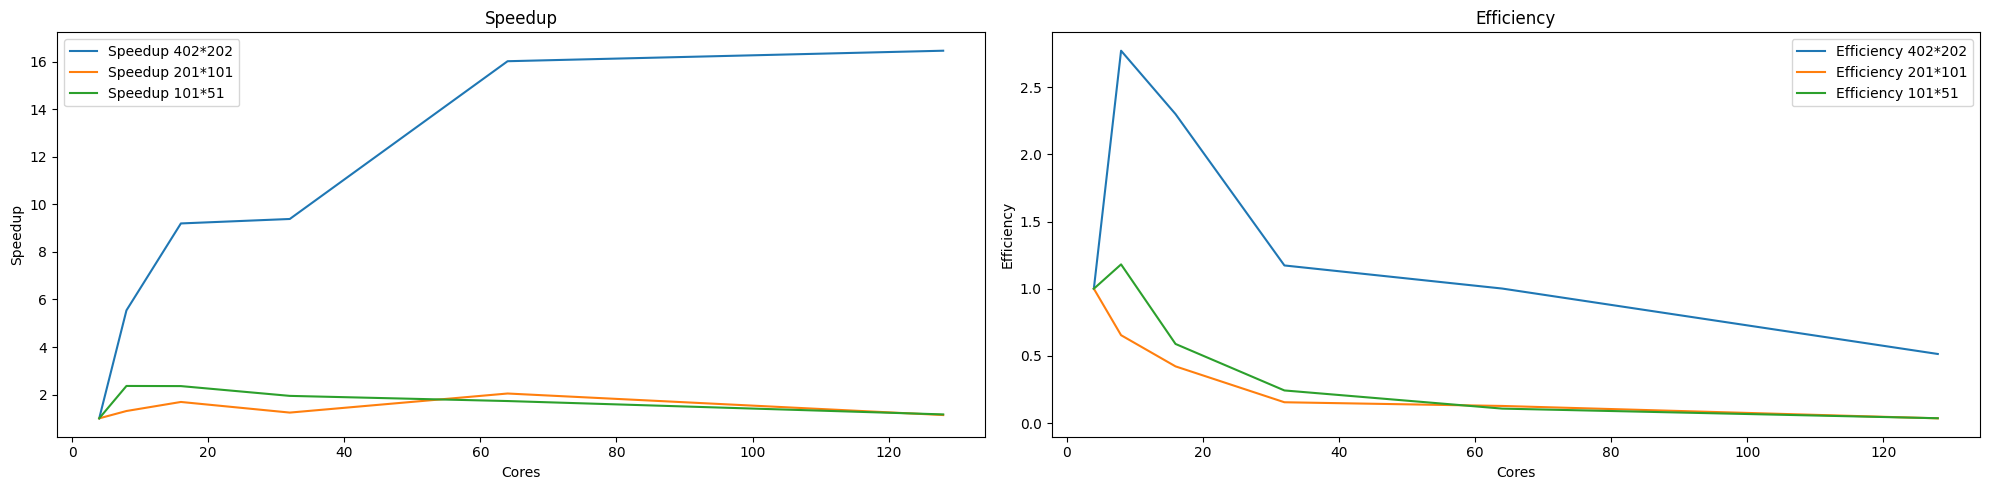

In [53]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for time, label in zip([OST_large, OST_mid, OST_small], ['402*202', '201*101', '101*51']):
    # Calculate speedup
    time_on_4_cores = time[0]  # time on 4 cores
    speedup = time_on_4_cores / time

    # Calculate efficiency
    efficiency = speedup / (cores / cores[0])  # normalized to the number of cores relative to 4

    # Speedup plot
    axs[0].plot(cores, speedup, label=f'Speedup {label}')
    
    # Efficiency plot
    axs[1].plot(cores, efficiency, label=f'Efficiency {label}')

# Settings for speedup plot
axs[0].set_xlabel('Cores')
axs[0].set_ylabel('Speedup')
axs[0].set_title('Speedup')
axs[0].legend()

# Settings for efficiency plot
axs[1].set_xlabel('Cores')
axs[1].set_ylabel('Efficiency')
axs[1].set_title('Efficiency')
axs[1].legend()

plt.tight_layout()
plt.show()


## Analysis for speedup and efficency

The speedup plot shows how much faster the simulation runs as we add more cores. It's calculated in my context by taking the time it took for the simulation to run on 4 cores and dividing it by the time it took on N cores. Ideally, if adding more cores didn't involve any extra overhead, we would expect this graph to be a straight line - doubling the cores would halve the run time, and so on. However, in the real practice, coordinating between more cores involves some overhead, which reduces the speedup we get.

For the large (402x202) case, we see a nearly linear speedup initially, but as we add more cores, the speedup tends to flatten. This means adding more cores is not helping us reduce the simulation time as much. The mid and small cases have a similar trend, but the speedup starts to flatten out sooner. In particular, for the small case (101x51), the speedup is minimal after 16 cores, which means there's no significant benefit to adding more cores beyond this point. These makes senses since in these cases, the size of grids are so small that lots of unnecessary communications were made during the run time. Hence less core will play a more efficient role in these situations.

Efficiency is a measure of how well we are using the computational resources. It's calculated by taking the speedup and dividing it by the number of cores (normalized to the number of cores at 4). If all cores were being used perfectly, the efficiency would be 1.

The efficiency plots show that as we add more cores, the efficiency drops. This is because the overhead of coordinating between more cores is causing the resources to be used less efficiently. The drop is more drastic in the small (101x51) case, which implies that for small simulations, adding more cores may not be beneficial as it results in lower efficiency. The larger the problem size (large and mid cases), the more efficiently we can use more cores.

In conclusion, while adding more cores can speed up simulations, it's important to consider the overhead that comes with it. The benefit of adding cores depends on the size of the problem - smaller simulations may not see as much speedup or efficiency increase from adding more cores.